In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
df = pd.read_csv("/content/narrowfile (1).csv")
df.head()

,ENERGY_EFFICIENCY,ENERGY_CONSUMPTION,CO2_EMISSIONS,HOT_WATER_COST,PROPERTY_TYPE,ENVIRONMENT_IMPACT,LIGHTING_COST,MAINHEAT_DESCRIPTION,HEATING_COST
0,75,147,3.5,101.0,House,72,106.0,"Boiler and radiators, mains gas",571.0
1,70,254,3.7,226.0,House,57,69.0,"Boiler and radiators, mains gas",740.0
2,66,228,4.1,90.0,House,60,71.0,"Boiler and radiators, mains gas",720.0
3,57,545,5.3,140.0,Maisonette,36,47.0,Electric storage heaters,664.0
4,68,231,2.4,95.0,Bungalow,68,55.0,"Boiler and radiators, mains gas",460.0


In [4]:
import tensorflow as tf

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181682 entries, 0 to 181681
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ENERGY_EFFICIENCY     181682 non-null  int64  
 1   ENERGY_CONSUMPTION    181682 non-null  int64  
 2   CO2_EMISSIONS         181682 non-null  float64
 3   HOT_WATER_COST        181681 non-null  float64
 4   PROPERTY_TYPE         181682 non-null  object 
 5   ENVIRONMENT_IMPACT    181682 non-null  int64  
 6   LIGHTING_COST         181681 non-null  float64
 7   MAINHEAT_DESCRIPTION  181682 non-null  object 
 8   HEATING_COST          181681 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 12.5+ MB


**DATA PREPROCESSING AND CLEANING**

In [6]:
# Check for missing values in columns
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ENERGY_EFFICIENCY       0
ENERGY_CONSUMPTION      0
CO2_EMISSIONS           0
HOT_WATER_COST          1
PROPERTY_TYPE           0
ENVIRONMENT_IMPACT      0
LIGHTING_COST           1
MAINHEAT_DESCRIPTION    0
HEATING_COST            1
dtype: int64


In [7]:
# Convert categorical columns to categorical data type
categorical_columns = ['MAINHEAT_DESCRIPTION', 'PROPERTY_TYPE']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181682 entries, 0 to 181681
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ENERGY_EFFICIENCY     181682 non-null  int64   
 1   ENERGY_CONSUMPTION    181682 non-null  int64   
 2   CO2_EMISSIONS         181682 non-null  float64 
 3   HOT_WATER_COST        181681 non-null  float64 
 4   PROPERTY_TYPE         181682 non-null  category
 5   ENVIRONMENT_IMPACT    181682 non-null  int64   
 6   LIGHTING_COST         181681 non-null  float64 
 7   MAINHEAT_DESCRIPTION  181682 non-null  category
 8   HEATING_COST          181681 non-null  float64 
dtypes: category(2), float64(4), int64(3)
memory usage: 10.1 MB


In [9]:
# replace missing values with Mean from sklearn inputer
from sklearn.impute import SimpleImputer
numerical_columns = ['ENERGY_EFFICIENCY', 'ENERGY_CONSUMPTION', 'CO2_EMISSIONS',
                     'HOT_WATER_COST', 'ENVIRONMENT_IMPACT', 'LIGHTING_COST', 'HEATING_COST']
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = df.copy()
df_imputed[numerical_columns] = imputer.fit_transform(df_imputed[numerical_columns])

In [10]:
# Check for missing values in columns
missing_values = df_imputed.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ENERGY_EFFICIENCY       0
ENERGY_CONSUMPTION      0
CO2_EMISSIONS           0
HOT_WATER_COST          0
PROPERTY_TYPE           0
ENVIRONMENT_IMPACT      0
LIGHTING_COST           0
MAINHEAT_DESCRIPTION    0
HEATING_COST            0
dtype: int64


In [11]:
#describe the dataset to check for outliers
df_imputed.describe()

,ENERGY_EFFICIENCY,ENERGY_CONSUMPTION,CO2_EMISSIONS,HOT_WATER_COST,ENVIRONMENT_IMPACT,LIGHTING_COST,HEATING_COST
count,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000
mean,63.614855,282.125235,3.661169,143.181296,61.386477,66.931903,610.240807
std,13.355965,140.982874,2.580631,77.071912,15.869106,31.004378,445.976647
min,1.000000,-128.000000,-2.700000,0.000000,1.000000,0.000000,0.000000
25%,56.000000,200.000000,2.200000,95.000000,51.000000,47.000000,354.000000
50%,66.000000,260.000000,3.200000,118.000000,62.000000,62.000000,524.500000
75%,73.000000,339.000000,4.600000,165.000000,72.000000,81.000000,766.000000
max,120.000000,17099.000000,271.000000,1757.000000,126.000000,2322.000000,41862.000000


In [12]:
#asbsolute values to remove the potential nagetive errors
columns_to_convert = ['ENERGY_CONSUMPTION', 'CO2_EMISSIONS', 'HOT_WATER_COST', 'LIGHTING_COST', 'HEATING_COST']
# Apply the absolute function to the specified columns
df_imputed[columns_to_convert] = df_imputed[columns_to_convert].apply(abs)
df_imputed.describe()

,ENERGY_EFFICIENCY,ENERGY_CONSUMPTION,CO2_EMISSIONS,HOT_WATER_COST,ENVIRONMENT_IMPACT,LIGHTING_COST,HEATING_COST
count,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000
mean,63.614855,282.141186,3.661505,143.181296,61.386477,66.931903,610.240807
std,13.355965,140.950950,2.580153,77.071912,15.869106,31.004378,445.976647
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,56.000000,200.000000,2.200000,95.000000,51.000000,47.000000,354.000000
50%,66.000000,260.000000,3.200000,118.000000,62.000000,62.000000,524.500000
75%,73.000000,339.000000,4.600000,165.000000,72.000000,81.000000,766.000000
max,120.000000,17099.000000,271.000000,1757.000000,126.000000,2322.000000,41862.000000


**EXPORATORY DATA ANALYSIS**

<ipython-input-13-13f64c2c2175>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(df_imputed, x='PROPERTY_TYPE', y='ENERGY_CONSUMPTION', ci=None)


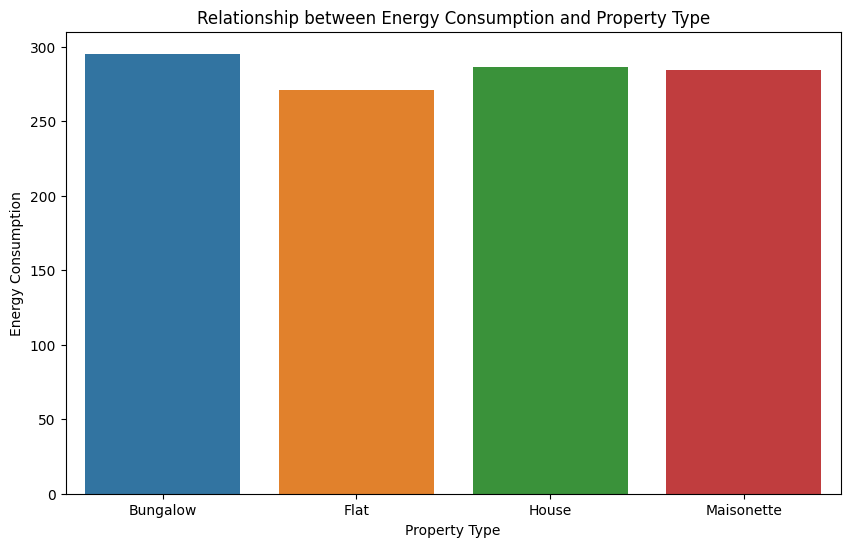

In [13]:
#Relationship between ENERGY_CONSUMPTION and PROPERTY_TYPE
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(df_imputed, x='PROPERTY_TYPE', y='ENERGY_CONSUMPTION', ci=None)
plt.title('Relationship between Energy Consumption and Property Type')
plt.xlabel('Property Type')
plt.ylabel('Energy Consumption')
plt.show()


<ipython-input-13-247665b62dfe>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_imputed, x='MAINHEAT_DESCRIPTION', y='ENERGY_CONSUMPTION', ci=None, order=top_mainheat)


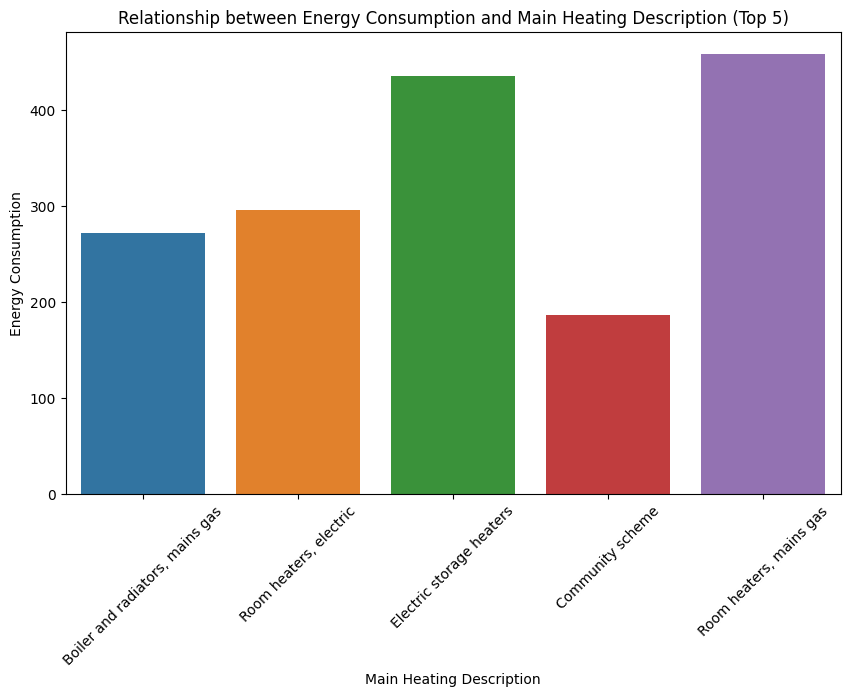

In [13]:
#Relationship between Energy Consumption and Main Heating Description
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 most common MAINHEAT_DESCRIPTION categories
top_mainheat = df_imputed['MAINHEAT_DESCRIPTION'].value_counts().head(5).index

plt.figure(figsize=(10, 6))
sns.barplot(data=df_imputed, x='MAINHEAT_DESCRIPTION', y='ENERGY_CONSUMPTION', ci=None, order=top_mainheat)
plt.title('Relationship between Energy Consumption and Main Heating Description (Top 5)')
plt.xlabel('Main Heating Description')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.show()



<ipython-input-52-fd5d6db37a3d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(df_imputed, x='PROPERTY_TYPE', y='ENVIRONMENT_IMPACT', ci=None)


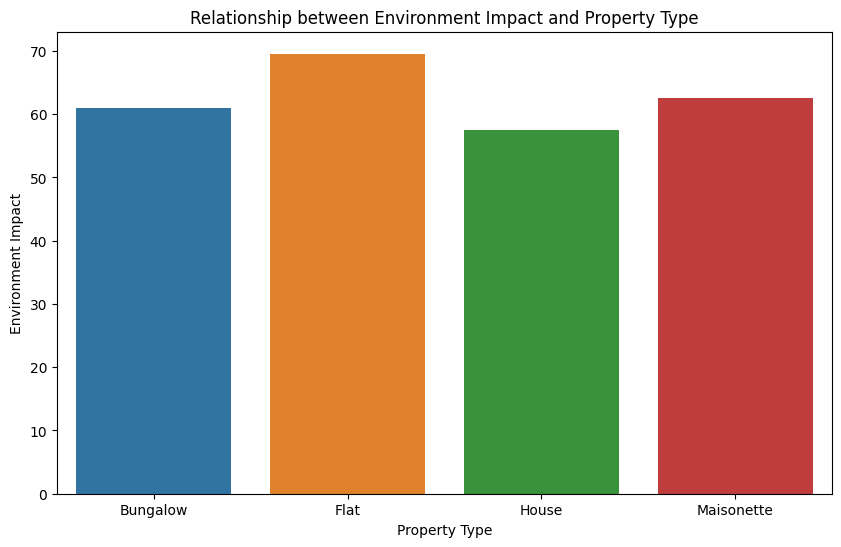

In [ ]:
#Relationship between ENVIRONMENT_IMPACT and PROPERTY_TYPE
plt.figure(figsize=(10, 6))
sns.barplot(df_imputed, x='PROPERTY_TYPE', y='ENVIRONMENT_IMPACT', ci=None)
plt.title('Relationship between Environment Impact and Property Type')
plt.xlabel('Property Type')
plt.ylabel('Environment Impact')
plt.show()


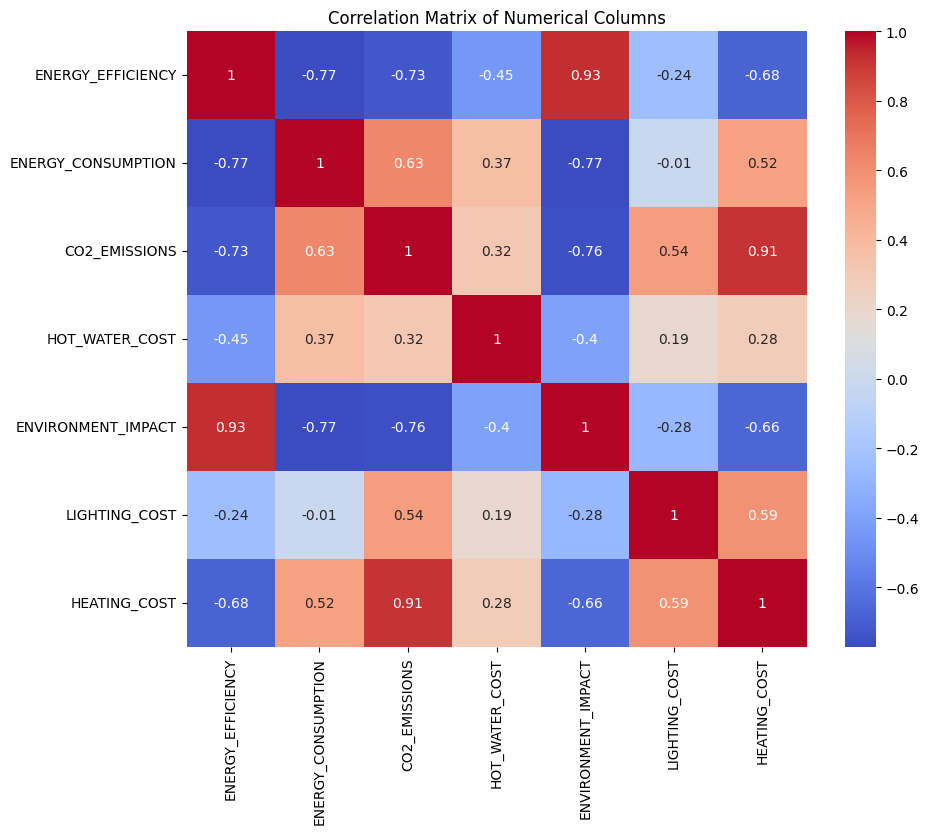

In [14]:
# Calculate correlation matrix for numerical columns
correlation_matrix = df_imputed[numerical_columns].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**FEATURE ENGINEERING**

In [15]:
from sklearn.preprocessing import StandardScaler
# Convert categorical variables to dummy variables
df_with_dummies = pd.get_dummies(df_imputed, columns=['PROPERTY_TYPE', 'MAINHEAT_DESCRIPTION'])

# Extract numerical columns for scaling
numerical_data = df_with_dummies[numerical_columns]

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the numerical data
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Create a new DataFrame with scaled numerical data
scaled_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)

# Combine the scaled numerical data with the dummy variables
final_df = pd.concat([scaled_df, df_with_dummies.drop(columns=numerical_columns)], axis=1)

# 'final_df' now contains both scaled numerical data and dummy variables
# Now you can use the .describe() method on the DataFrame
summary_stats = final_df.describe()

# Display the summary statistics
summary_stats

,ENERGY_EFFICIENCY,ENERGY_CONSUMPTION,CO2_EMISSIONS,HOT_WATER_COST,ENVIRONMENT_IMPACT,LIGHTING_COST,HEATING_COST,PROPERTY_TYPE_Bungalow,PROPERTY_TYPE_Flat,PROPERTY_TYPE_House,...,"MAINHEAT_DESCRIPTION_Room heaters, radiators, electric","MAINHEAT_DESCRIPTION_Room heaters, smokeless fuel","MAINHEAT_DESCRIPTION_Room heaters, wood logs","MAINHEAT_DESCRIPTION_Room heaters, |Gwresogyddion ystafell, |electric|trydan",MAINHEAT_DESCRIPTION_SAP05:Main-Heating,"MAINHEAT_DESCRIPTION_Warm air, Electricaire","MAINHEAT_DESCRIPTION_Warm air, electric","MAINHEAT_DESCRIPTION_Warm air, mains gas","MAINHEAT_DESCRIPTION_Water source heat pump, radiators, electric","MAINHEAT_DESCRIPTION_Water source heat pump, warm air, electric"
count,1.816820e+05,1.816820e+05,1.816820e+05,1.816820e+05,1.816820e+05,1.816820e+05,1.816820e+05,181682.000000,181682.000000,181682.000000,...,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000
mean,-1.188918e-16,1.495534e-16,-8.385000e-17,1.626940e-16,-1.436088e-16,-2.903463e-16,6.507761e-17,0.054860,0.299144,0.623281,...,0.000006,0.000105,0.000050,0.000325,0.001921,0.000407,0.000116,0.001238,0.000022,0.000011
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.227707,0.457884,0.484565,...,0.002346,0.010226,0.007038,0.018018,0.043787,0.020178,0.010751,0.035170,0.004692,0.003318
min,-4.688169e+00,-2.001703e+00,-1.419108e+00,-1.857767e+00,-3.805296e+00,-2.158795e+00,-1.368328e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.701479e-01,-5.827659e-01,-5.664429e-01,-6.251490e-01,-6.545111e-01,-6.428756e-01,-5.745626e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.785833e-01,-1.570848e-01,-1.788679e-01,-3.267256e-01,3.866155e-02,-1.590716e-01,-1.922546e-01,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.026951e-01,4.033954e-01,3.637370e-01,2.830962e-01,6.688185e-01,4.537468e-01,3.492551e-01,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.221732e+00,1.193103e+02,1.036137e+02,2.093919e+01,4.071666e+00,7.273406e+01,9.249783e+01,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Split the data into feature matrix X and target variable y
from sklearn.model_selection import train_test_split
X = final_df.drop(columns=['HEATING_COST'])
y = final_df['HEATING_COST']

# Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**MACHINE LEARNING MODELS**

**LINEAR REGRESSION**

In [17]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

# Train the model on the training data
regression_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions on the test data
y_pred = regression_model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (coefficient of determination) score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 282049924530.57935
R-squared: -255046459703.62454


**GRADIENT BOOSTING**

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Create a Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor()

# Train the model on the training data
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gradient_boosting_model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (coefficient of determination) score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.1884835577215442
R-squared: 0.8295618614703788


In [20]:
#Calculate the mean absolute error (MAE)
mae_gradient_boosting = mean_absolute_error(y_test, y_pred)
mae_gradient_boosting

0.1788211686847151

**RANDOM FOREST**

In [21]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model on the training data
random_forest_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (coefficient of determination) score on the test data
r2 = r2_score(y_test, y_pred)

print("Random Forest Model - Mean Squared Error:", mse)
print("Random Forest Model - R-squared:", r2)

Random Forest Model - Mean Squared Error: 0.14973450684413572
Random Forest Model - R-squared: 0.8646010775228047


In [22]:
#Calculate the mean absolute error (MAE)
mae_random_forest = mean_absolute_error(y_test, y_pred)
mae_random_forest

0.10167038776004779

# **ANN**

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),      # Hidden layer 1
    layers.Dense(32, activation='relu'),      # Hidden layer 2
    layers.Dense(1)                           # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
3634/3634 [==============================] - 15s 4ms/step - loss: 0.0920 - val_loss: 0.1010
Epoch 2/50
3634/3634 [==============================] - 9s 2ms/step - loss: 0.0871 - val_loss: 0.0759
Epoch 3/50
3634/3634 [==============================] - 9s 2ms/step - loss: 0.0737 - val_loss: 0.0653
Epoch 4/50
3634/3634 [==============================] - 8s 2ms/step - loss: 0.0727 - val_loss: 0.1285
Epoch 5/50
3634/3634 [==============================] - 9s 2ms/step - loss: 0.0689 - val_loss: 0.0598
Epoch 6/50
3634/3634 [==============================] - 9s 2ms/step - loss: 0.0716 - val_loss: 0.0748
Epoch 7/50
3634/3634 [==============================] - 7s 2ms/step - loss: 0.0628 - val_loss: 0.0634
Epoch 8/50
3634/3634 [==============================] - 8s 2ms/step - loss: 0.0597 - val_loss: 0.0686
Epoch 9/50
3634/3634 [==============================] - 10s 3ms/step - loss: 0.0566 - val_loss: 0.0594
Epoch 10/50
3634/3634 [==============================] - 7s 2ms/step - loss: 0.0

In [26]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error on Test Data:", loss)

1136/1136 [==============================] - 2s 1ms/step - loss: 0.0496
Mean Squared Error on Test Data: 0.049631137400865555


In [27]:
from sklearn.metrics import r2_score

# Predict the target variable using the trained ANN model
y_pred_ann = model.predict(X_test)

# Calculate the R-squared value
r2_ann = r2_score(y_test, y_pred_ann)
print("R-squared for ANN Model:", r2_ann)


1136/1136 [==============================] - 3s 2ms/step
R-squared for ANN Model: 0.9551205585340258


In [28]:
y_pred_ann

array([[-0.70857686],
       [-0.5368492 ],
       [ 1.3975979 ],
       ...,
       [ 1.0378258 ],
       [ 0.36253613],
       [ 0.28424776]], dtype=float32)

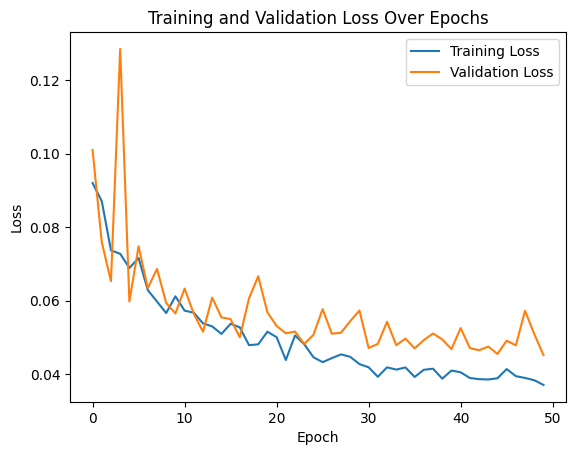

In [29]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [30]:
# Select a sample from the test set for sensitivity analysis
sample_index = 0
sample_features = X_test.iloc[sample_index]

# Get the predicted value for the selected sample
original_prediction = model.predict(sample_features.values.reshape(1, -1))

# Perform sensitivity analysis by perturbing each feature
sensitivity_results = {}
for feature in X.columns:
    perturbed_features = sample_features.copy()
    perturbed_features[feature] += 0.1  # Perturb the feature value
    perturbed_prediction = model.predict(perturbed_features.values.reshape(1, -1))
    sensitivity_results[feature] = perturbed_prediction - original_prediction

1/1 [==============================] - 0s 25ms/step


In [31]:
# Create a DataFrame to store sensitivity results
sensitivity_df = pd.DataFrame(columns=['Feature', 'Sensitivity'])

# Select a sample from the test set for sensitivity analysis
sample_index = 0
sample_features = X_test.iloc[sample_index]

# Get the predicted value for the selected sample
original_prediction = model.predict(sample_features.values.reshape(1, -1))

# Perform sensitivity analysis by perturbing each feature
for feature in X.columns:
    perturbed_features = sample_features.copy()
    perturbed_features[feature] += 0.1  # Perturb the feature value
    perturbed_prediction = model.predict(perturbed_features.values.reshape(1, -1))
    sensitivity = perturbed_prediction - original_prediction
    sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)

# Sort the DataFrame by sensitivity
sensitivity_df = sensitivity_df.sort_values(by='Sensitivity', ascending=False)

# Print or display the sensitivity results table
sensitivity_df


1/1 [==============================] - 0s 22ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)
<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-31-ba24669a4e7b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_df = sensitivity_df.append({'Feature': feature, 'Sensitivity': sensitivity[0][0]}, ignore_index=True)


,Feature,Sensitivity
45,MAINHEAT_DESCRIPTION_Boiler and underfloor hea...,0.024351
4,ENVIRONMENT_IMPACT,0.021169
22,"MAINHEAT_DESCRIPTION_Boiler and radiators, ant...",0.021100
38,"MAINHEAT_DESCRIPTION_Boiler and radiators, smo...",0.020122
76,MAINHEAT_DESCRIPTION_Portable electric heating...,0.020057
...,...,...
66,MAINHEAT_DESCRIPTION_Electric underfloor heating,-0.040156
80,"MAINHEAT_DESCRIPTION_Room heaters, dual fuel (...",-0.045292
16,"MAINHEAT_DESCRIPTION_Air source heat pump, war...",-0.054911
0,ENERGY_EFFICIENCY,-0.055025


#  **TESTING IN NEW SCENERIO**
Let's assume that we want to assess the performance of the ANN model under the scenario where there is a 20% reduction in both CO2 emissions and energy consumption, and a 10% increase in hot water cost. We can apply this assumption to the test data and compare the predicted heating costs with the original heating costs.

In [32]:
 #Apply the assumption to the test data
X_test_assumption = X_test.copy()
X_test_assumption['CO2_EMISSIONS'] *= 0.8  # 20% reduction
X_test_assumption['ENERGY_CONSUMPTION'] *= 0.8  # 20% reduction
X_test_assumption['HOT_WATER_COST'] *= 1.1  # 10% increase

In [33]:
# Make predictions on the test data with the assumption
y_pred_assumption = model.predict(X_test_assumption)

1136/1136 [==============================] - 2s 2ms/step


In [34]:
# Calculate the differences between the original predicted heating costs and the assumption's predicted heating costs
heating_cost_difference_assumption = y_pred_ann - y_pred_assumption

In [35]:
heating_cost_difference_assumption

array([[-0.00989139],
       [-0.06338346],
       [ 0.2758175 ],
       ...,
       [ 0.0832302 ],
       [ 0.0504874 ],
       [ 0.10106835]], dtype=float32)

In [36]:
# Reshape the variables if needed
y_pred_ann_reshaped = y_pred_ann.reshape(-1)
y_pred_assumption_reshaped = y_pred_assumption.reshape(-1)
heating_cost_difference_assumption_reshaped = heating_cost_difference_assumption.reshape(-1)
# Create a new DataFrame to store the results
df_assumption_results = pd.DataFrame({
    'Original_Predicted_Heating_Cost': y_pred_ann_reshaped,
    'Assumption_Predicted_Heating_Cost': y_pred_assumption_reshaped,
    'Heating_Cost_Difference_Assumption': heating_cost_difference_assumption_reshaped
})

# Display the assumption results DataFrame
df_assumption_results

,Original_Predicted_Heating_Cost,Assumption_Predicted_Heating_Cost,Heating_Cost_Difference_Assumption
0,-0.708577,-0.698685,-0.009891
1,-0.536849,-0.473466,-0.063383
2,1.397598,1.121780,0.275818
3,5.880675,5.397517,0.483158
4,-1.311677,-1.297956,-0.013721
...,...,...,...
36332,0.659958,0.556915,0.103043
36333,0.318429,0.433152,-0.114723
36334,1.037826,0.954596,0.083230
36335,0.362536,0.312049,0.050487


In [37]:
# Calculate the sum of values in each column
sum_values = df_assumption_results.sum()

# Convert the sum into a DataFrame and transpose it
sum_df = sum_values.to_frame().T

# Display the sum DataFrame
sum_df


,Original_Predicted_Heating_Cost,Assumption_Predicted_Heating_Cost,Heating_Cost_Difference_Assumption
0,-457.970337,-1340.939453,882.969055


the assumption leads to an increase in cost

# END